# 1 气象数据处理
## CSV文件表头
csv文件结构如下
```
## Site Characteristics
Country     = 'Netherlands'
Station     = 'Wageningen, Haarweg'
Description = 'Observed data from Station Haarweg in Wageningen'
Source      = 'Meteorology and Air Quality Group, Wageningen University'
Contact     = 'Peter Uithol'
Longitude = 5.67; Latitude = 51.97; Elevation = 7; AngstromA = 0.18; AngstromB = 0.55; HasSunshine = False
## Daily weather observations (missing values are NaN)
DAY,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH
20040101,NaN,-0.7,1.1,0.55,3.6,0.5,NaN
20040102,3888,-7.5,0.9,0.44,3.1,0,NaN
20040103,2074,-6.8,-0.5,0.45,1.8,0,NaN
20040104,1814,-3.6,5.9,0.66,3.2,2.5,NaN
20040105,1469,3,5.7,0.78,2.3,1.3,NaN
[...]

with
IRRAD in kJ/m2/day or hours
TMIN and TMAX in Celsius (°C)
VAP in kPa
WIND in m/sec
RAIN in mm
SNOWDEPTH in cm
```


In [2]:
import copy

In [2]:
## 两日相隔天数
from datetime import datetime
def calDays(start, end, format="%Y-%m-%d"):
    strptime, strftime = datetime.strptime, datetime.strftime
    days = (strptime(end, format) - strptime(start, format)).days
    return days

In [3]:
def csv_header(country="China", station="Yangling", longitude=108.12, latitude=34.33, elevation=521):
    res_s = f"## Site Characteristics\nCountry     = {country}\nStation     = {station}\nDescription = 'Observed data from Station {station} in {country}'\
    \nSource      = 'Meteorology and Air Quality Group, Wageningen University'\nContact     = 'Peter Uithol'\
    \nLongitude = {longitude:.2f}; Latitude = {latitude:.2f}; Elevation = {elevation:.0f}; AngstromA = 0.18; AngstromB = 0.55; HasSunshine = False\
    \n## Daily weather observations (missing values are NaN)"
    return res_s

In [4]:
print(csv_header())

## Site Characteristics
Country     = China
Station     = Yangling
Description = 'Observed data from Station Yangling in China'    
Source      = 'Meteorology and Air Quality Group, Wageningen University'
Contact     = 'Peter Uithol'    
Longitude = 108.12; Latitude = 34.33; Elevation = 521; AngstromA = 0.18; AngstromB = 0.55; HasSunshine = False    
## Daily weather observations (missing values are NaN)


# 2 读取模型参数

In [3]:
%matplotlib inline
import sys, os
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
import pandas as pd

data_dir = os.path.join(os.getcwd(), "data")
import pcse
print("This notebook was built with:")
print("python version: %s " % sys.version)
print("PCSE version: %s" %  pcse.__version__)

This notebook was built with:
python version: 3.8.15 (default, Nov  4 2022, 15:16:59) [MSC v.1916 64 bit (AMD64)] 
PCSE version: 5.5.4


## 2.1 作物参数

In [4]:
from pcse.fileinput import YAMLCropDataProvider, CABOFileReader
from pcse.exceptions import PCSEError, PartitioningError

In [5]:
cropfile = os.path.join(data_dir, 'crop', 'maize.yaml')
cropd = YAMLCropDataProvider()
cropd.set_active_crop('maize', 'Grain_maize_201')

## 2.2 土壤参数

In [6]:
soilfile = os.path.join(data_dir, 'soil', 'ec3_copy1.soil')
soild = CABOFileReader(soilfile)

## 2.3 站点数据

In [7]:
from pcse.util import WOFOST72SiteDataProvider
sited = WOFOST72SiteDataProvider(WAV=18)

## 2.4 整合模型参数

In [8]:
from pcse.base import ParameterProvider
# parameters = ParameterProvider(cropdata=cropd, soildata=soild, sitedata=sited)

In [9]:
# cropfile = os.path.join(data_dir, 'crop', 'MAG201.CAB')
# crop_param = CropParam(cropfile, soild, sited)
parameters = ParameterProvider(cropdata=cropd, soildata=soild, sitedata=sited)

## 2.5 管理文件

In [93]:
from pcse.fileinput import YAMLAgroManagementReader
agromanagement21 = YAMLAgroManagementReader(os.path.join(data_dir, 'agro', 'maize_2021.agro'))
agromanagement22 = YAMLAgroManagementReader(os.path.join(data_dir, 'agro', 'maize_2022.agro'))

## 2.6气象数据

In [94]:
from pcse.fileinput import ExcelWeatherDataProvider
weatherfile = os.path.join(data_dir, 'meteo', 'WOFOSTYL.xlsx')
wdp = ExcelWeatherDataProvider(weatherfile)
print(wdp)

Weather data provided by: ExcelWeatherDataProvider
--------Description---------
Weather data for:
Country: China
Station: Yangling, Shannxi
Description: Observed data from Station Yangling in China
Source: Meteorology and Air Quality Group, Wageningen University
Contact: Peter Uithol
----Site characteristics----
Elevation:  521.0
Latitude:  34.330
Longitude: 108.120
Data available for 2021-06-01 - 2022-10-31
Number of missing days: 182



## 测试参数是否可用于敏感性分析

TMPFTB=[0, 4, 16, 18, 20, 28, 36, 42]
TMNFTB = 8℃
RFSETB 只涉及后两个参数[0, 1.5, 1.75, 2]

In [18]:
# parameters.clear_override()
# parameters.set_override("TSUMEM", 150.0)
# parameters.set_override("TSUM1", 1290)
# parameters.set_override("TSUM2", 650)

In [19]:
# from pcse.models import Wofost72_PP, Wofost72_WLP_FD
# # wofostpp = Wofost72_PP(parameters, wdp, agromanagement21)
# wofostwlp = Wofost72_WLP_FD(parameters, wdp, agromanagement22)
# print(parameters["TSUMEM"])
# # wofostpp.run_till_terminate()
# wofostwlp.run_till_terminate()

150.0


In [20]:
calDays("2021-06-12", "2021-09-30")

110

In [69]:
# wofostwlp.get_summary_output()

[{'DVS': 2.0,
  'LAIMAX': 4.900533915204891,
  'TAGP': 13606.692400736049,
  'TWSO': 4056.622022326808,
  'TWLV': 3282.686717539008,
  'TWST': 6267.383660870233,
  'TWRT': 1952.9191748063402,
  'CTRAT': 25.23405195892749,
  'RD': 100.0,
  'DOS': datetime.date(2022, 6, 11),
  'DOE': datetime.date(2022, 6, 18),
  'DOA': datetime.date(2022, 8, 16),
  'DOM': datetime.date(2022, 9, 24),
  'DOH': None,
  'DOV': None,
  'CEVST': 6.894467012479122}]

In [21]:
i = calDays("2021-06-11", "2021-09-20")
i

101

In [71]:
param_name = ["TDWI", "LAIEM", "RGRLAI", "SLATB", "SPAN", "TBASE", "KDIFTB", "EFFTB", "AMAXTB", "TMPFTB", "TMNFTB", "CVL", "CVO", "CVR", "CVS", "Q10", "RML",
              "RMO", "RMR", "RMS", "RFSETB", "FRTB", "FLTB", "FOTB", "RDRRTB", "RDRSTB", "CFET", "DEPNR", "RDI", "RRI", "RDMCR"]

In [72]:
parameters["LAIEM"]

KeyError: 'LAIEM'

In [73]:
for each in param_name:
    try:
        # print("**************\n")

        test = parameters[each]

    except KeyError:
        print(each)

LAIEM



# 3 敏感性分析

In [10]:
import yaml
import numpy as np
# import pandas as pd
from SALib.sample import saltelli
from SALib.analyze import sobol, fast
# import matplotlib.pyplot as plt
from IPython.display import display
# pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", 250)
from progressbar import printProgressBar, PrintProgressBar

## 3.1敏感性分析设置

In [36]:
# Define the target variable
# target_variable = ["TWSO", "TWLV", "TWST", "TAGP", "LAImax"]
with open(os.path.join(data_dir, 'yaml', 'params2.yaml'), 'r', encoding='utf-8') as f:
    problem_yaml = f.read()
# For each scalar parameter, determine a sensible interval
# problem_yaml = """
#     num_vars: 5
#     names:
#     - TSUM1
#     - TSUM2
#     - SPAN
#     - Q10
#     - TDWI
#     bounds:
#     - [500, 800]
#     - [1200, 1600]
#     - [28, 37]
#     - [1.8, 2.2]
#     - [0.4, 0.6]
# """
problem = yaml.safe_load(problem_yaml)

In [ ]:
# from SALib.sample import sobol as sobolSample
# calc_second_order = True
# nsamples = 2 ** 6
# boundss_sobol = sobolSample.sample(problem, nsamples, calc_second_order=calc_second_order, seed=630)
# print("We are going to do %s simulations" % len(paramsets_sobol))

In [31]:
# names = problem["names"]
# bounds = problem["bounds"]

In [32]:
# mycropd = {
#         "AMAXTB": [0.0, 70.0, 1.25, 70.0, 1.5, 63.0, 1.75, 49.0, 2.0, 21.0],
#         "TMPFTB": [0.00, 0.01, 9.00, 0.05, 16.0, 0.80, 18.0, 0.94, 20.0, 1.0, 30.0, 1.0, 36.0, 0.95, 42.0, 0.56],
#         "TMNFTB": [5.0, 0.0, 8.0, 1.0],
#         "RFSETB": [0.0, 1.0, 1.5, 1.0, 1.75, 0.75, 2.0, 0.25],
#         "SLATB": [0.0, 0.0026, 1.0, 0.0012, 2.0, 0.0012],
#         "KDIFTB": [0.0, 0.6, 2.0, 0.6],
#         "EFFTB": [0.0, 0.45, 40.0, 0.45]

#     }

In [28]:
# value_slatb = mycropd["SLATB"]
# bounds[0], bounds[1], bounds[2]= my_bounds(value_slatb[1]), my_bounds(value_slatb[3]), my_bounds(value_slatb[5])

# values = mycropd["KDIFTB"]
# bounds[3], bounds[4] = my_bounds(values[1]), my_bounds(values[3])

# values = mycropd["EFFTB"]
# bounds[5], bounds[6] = my_bounds(values[1]), my_bounds(values[3])

# values = mycropd["AMAXTB"]
# bounds[10], bounds[7], bounds[8], bounds[9], bounds[11] = my_bounds(values[1]), my_bounds(values[3]), my_bounds(values[5]), my_bounds(values[7]), my_bounds(values[9]) 

# values = mycropd["TMPFTB"]
# bounds[12], bounds[13] = my_bounds(values[1]), my_bounds(values[11])

# values = mycropd["TMNFTB"]
# bounds[14] = my_bounds(values[3])

# values = mycropd["RFSETB"]
# bounds[15], bounds[16] = my_bounds(values[1]), my_bounds(values[7])

In [ ]:
# def my_bounds(aa):
#     return [0.5*aa, 1.5*aa]

In [ ]:
# for i in range(17, len(names)):
#     value = parameters[names[i]]
#     bounds[i] = my_bounds(value)


In [29]:
# with open("./data/yaml/params2.yaml", 'w') as f:
#     f.write(yaml.dump(problem, allow_unicode=True))

SLATB1: [0.0013, 0.0039]
SLATB2: [0.0006, 0.0018]
SLATB3: [0.0006, 0.0018]
KDIFTB0: [0.3, 0.8999999999999999]
KDIFTB2: [0.3, 0.8999999999999999]
EFFTB1: [0.225, 0.675]
EFFTB2: [0.225, 0.675]
AMAXTB125: [35.0, 105.0]
AMAXTB150: [31.5, 94.5]
AMAXTB175: [24.5, 73.5]
AMAXTB000: [35.0, 105.0]
AMAXTB200: [10.5, 31.5]
TMPFTB0: [0.005, 0.015]
TMPFTB30: [0.5, 1.5]
TMNFTB8: [0.5, 1.5]
RFSETB0: [0.5, 1.5]
RFSETB2: [0.125, 0.375]
CVL: [0.34, 1.02]
CVO: [0.3355, 1.0065]
CVR: [0.345, 1.035]
CVS: [0.329, 0.9870000000000001]
Q10: [1.0, 3.0]
RML: [0.015, 0.045]
RMO: [0.005, 0.015]
RMR: [0.0075, 0.0225]
RMS: [0.0075, 0.0225]
PERDL: [0.015, 0.045]
RDI: [5.0, 15.0]
RRI: [1.1, 3.3000000000000003]
TBASEM: [2.0, 6.0]
TEFFMX: [15.0, 45.0]
TSUM1: [347.5, 1042.5]
TSUM2: [400.0, 1200.0]
TDWI: [25.0, 75.0]
RGRLAI: [0.0147, 0.0441]
SPAN: [16.5, 49.5]


In [16]:
def my_bounds(aa):
    return [0.5*aa, 1.5*aa]

In [17]:
for i in range(17, len(names)):
    value = parameters[names[i]]
    bounds[i] = my_bounds(value)


In [19]:
with open("./data/yaml/params2.yaml", 'w') as f:
    f.write(yaml.dump(problem, allow_unicode=True))

In [63]:
from SALib.sample.fast_sampler import sample as efast_sample
nsamples = 100
paramsets = efast_sample(problem, nsamples, 4, seed=1354331612)
paramset = paramsets[0]

In [64]:
# 修改作物参数用
param_dict = {
    "SLATB": {"SLATB1": [0.00, 1], "SLATB2": [0.50, 3], "SLATB3": [0.78, 5], "SLATB4": [2.00, 7]},
    "KDIFTB": {"KDIFTB1": [0.0, 1], "KDIFTB2": [2.0, 3]},
    "EFFTB": {"EFFTB1": [0.0, 1], "EFFTB2": [40.0, 3]},
    "AMAXTB": {"AMAXTB1": [0.00, 1], "AMAXTB2": [1.25, 3], "AMAXTB3": [1.50, 5], "AMAXTB4": [1.75, 7], "AMAXTB5": [2.00, 9]},
    "TMPFTB": {
        "TMPFTB1": [0.00, 1],
        "TMPFTB2": [4.00, 3],
        "TMPFTB3": [16.00, 5],
        "TMPFTB4": [18.00, 7],
        "TMPFTB5": [20.00, 9],
        "TMPFTB6": [28.00, 11],
        "TMPFTB7": [36.00, 13],
        "TMPFTB8": [42.00, 15]
    },
    "TMNFTB": {"TMNFTB1": [8.00, 3]},
    "RFSETB": {
        "RFSETB1": [1.75, 5],
        "RFSETB2": [2.00, 7],
    },
    "FRTB": {
        "FRTB1": [0.00, 1],
        "FRTB2": [0.70, 15],
        "FRTB3": [0.90, 19]
    },
    "FLTB": {
        "FLTB1": [0.00, 1],
        "FLTB2": [0.33, 3],
        "FLTB3": [0.88, 5],
        "FLTB4": [1.10, 9],
    },
    "FOTB": {"FOTB1": [1.25, 7]},
    "RDRRTB": {
        "RDRRTB1": [1.5001, 5],
        "RDRRTB2": [2.00, 7]
    },
    "RDRSTB": {
        "RDRSTB1": [1.5001, 5],
        "RDRSTB2": [2.00, 7],
    }
}

In [65]:

# parameters.clear_override()
# for name, value in zip(problem["names"], paramsets[0]):
#     try:
#         parameters.set_override(name, value)
#     except PCSEError:
#         tmp_n = name[: -1]
#         tem_d1 = param_dict[tmp_n]
#         tmp_list = tem_d1[name]
#         tmp_value = parameters[tmp_n]
#         try:
#             tmp_value[tmp_list[1] -1], tmp_value[tmp_list[1]] = tmp_list[0], value
#         except IndexError:
#             tmp_value.extend([tmp_list[0], value])
#             print(tmp_value)
#         parameters.set_override(tmp_n, tmp_value)


In [66]:

def deciaml1(num:float, n:int):
    return int(num * 10**n) / 10 ** n

In [67]:
# parameters = crop_param.initial()
# parameters.set_override("FLTB", [0.00, 0.62, 0.33, 0.59, 0.88, 0.16, 0.95, 0.15, 1.10, 0.11, 1.20, 0.00, 2.00, 0.00])
# wofostpp = Wofost72_PP(parameters, wdp, agromanagement21)
# wofostpp.run_till_terminate()

In [68]:
from pcse.models import Wofost72_PP, Wofost72_WLP_FD

### 3.1.1设置提取的值 

In [69]:
# def parase_model_ouput(model_outplut: list, var_name: list, pid, idx=0):
#     res_ = list()
#     for each in var_name:
#         try:
#             res_.append(model_outplut[idx][each])
#         except KeyError as e:
#             print("%s\n 不存在key=%s"%(e, each))
#             res_.append(None)
#         except IndexError:
#             res_.append(None)
#
#     res_.append(pid)
#     return res_

In [70]:
def create_dict(key_das):
    res_dict = dict()
    res_dict["0"] = list()
    for each in key_das:
        dict_key = str(each)
        res_dict[dict_key] = list()
    return res_dict
#
#
# def get_wofost_output(wofostModel, var_names, template_dict, pid, var_list=None):
#     wofostModel.run_till_terminate()
#     r = wofostModel.get_summary_output()
#     tmp_res = parase_model_ouput(r, var_name=var_names, pid=pid, idx=0)
#     template_dict["0"].append(tmp_res)
#     if var_list is None:
#         pass
#     else:
#         days, name_ = var_list
#         r = wofostModel.get_output()
#         for ii in days:
#             # print(ii)
#             tmp_res = None
#             tmp_res = parase_model_ouput(r, var_name=name_, idx=ii, pid=pid)
#             template_dict[str(ii)].append(tmp_res)
#
#     return template_dict
#


In [71]:
tmp_dict = problem["bounds"]

In [72]:
problem

{'num_vars': 36,
 'names': ['SLATB1',
  'SLATB2',
  'SLATB3',
  'KDIFTB0',
  'KDIFTB2',
  'EFFTB1',
  'EFFTB2',
  'AMAXTB125',
  'AMAXTB150',
  'AMAXTB175',
  'AMAXTB000',
  'AMAXTB200',
  'TMPFTB0',
  'TMPFTB30',
  'TMNFTB5',
  'RFSETB0',
  'RFSETB2',
  'CVL',
  'CVO',
  'CVR',
  'CVS',
  'Q10',
  'RML',
  'RMO',
  'RMR',
  'RMS',
  'PERDL',
  'RDI',
  'RRI',
  'TBASEM',
  'TEFFMX',
  'TSUM1',
  'TSUM2',
  'TDWI',
  'RGRLAI',
  'SPAN'],
 'bounds': [[0.00175, 0.00525],
  [0.0008, 0.0024000000000000002],
  [0.0008, 0.0024000000000000002],
  [0.3, 0.8999999999999999],
  [0.3, 0.8999999999999999],
  [0.25, 0.75],
  [0.25, 0.75],
  [35.0, 105.0],
  [31.5, 94.5],
  [24.5, 73.5],
  [35.0, 105.0],
  [10.5, 31.5],
  [0.0025, 0.0075],
  [0.5, 1.5],
  [0.0025, 0.0075],
  [0.5, 1.5],
  [0.5, 1.5],
  [0.36, 1.08],
  [0.36, 1.08],
  [0.36, 1.08],
  [0.345, 1.035],
  [1.0, 3.0],
  [0.015, 0.045],
  [0.005, 0.015],
  [0.005, 0.015],
  [0.0075, 0.0225],
  [0.015, 0.045],
  [5.0, 15.0],
  [0.6, 1.79999

In [73]:
for i in range(len(tmp_dict)):
    tmp_list = tmp_dict[i]
    mean_ = np.mean(tmp_list)
    tmp_list[0], tmp_list[1] = mean_ - mean_ * 0.5, mean_ + mean_ * 0.5
    tmp_dict[i] = tmp_list

In [74]:
tmp_dict[8]

[31.5, 94.5]

In [7]:
final_target = ["LAIMAX", "TAGP", "TWSO", "DOE", "DOA", "DOM"]
time_target = ["LAI", "TAGP"]
das = [i for i in range(126)]
model_start_date = "2021-06-01"
sowing_date = "2021-06-11"
base_i = calDays(model_start_date, sowing_date)
for idx, value_ in enumerate(das):
    das[idx] = base_i + value_

col1 = ["LAIMAX", "TAGP", "TWSO", "DOE", "DOA", "DOM", "id"]
col2 = ["LAI", "TAGP", "id"]

In [8]:
das

[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135]

In [76]:
mycropd = {
    "AMAXTB": [0.0, 70.0, 1.25, 70.0, 1.5, 63.0, 1.75, 49.0, 2.0, 21.0],
    "TMPFTB": [0.00, 0.01, 9.00, 0.05, 16.0, 0.80, 18.0, 0.94, 20.0, 1.0, 30.0, 1.0, 36.0, 0.95, 42.0, 0.56],
    "TMNFTB": [5.0, 0.0, 8.0, 1.0],
    "RFSETB": [0.0, 1.0, 1.5, 1.0, 1.75, 0.75, 2.0, 0.25],
    "SLATB": [0.0, 0.0026, 1.0, 0.0012, 2.0, 0.0012],
    "KDIFTB": [0.0, 0.6, 2.0, 0.6],
    "EFFTB": [0.0, 0.45, 40.0, 0.45]

}


In [77]:
import time
import pickle
from progressbar import printProgressBar, PrintProgressBar
from wofostSA import run_wofost

In [78]:
nsets = len(paramsets)
result_template = create_dict(das)
# result_wlp = create_dict(das)
result_template["names1"] = col1
result_template["names2"] = col2
# result_wlp["names1"] = col1
# result_wlp["names2"] = col2
## params1用
# pbar = PrintProgressBar(nsets, prefix='Progress:', suffix='Complete', decimals=1, length=50, fill='█', printEnd="\r")
# pbar.printProgressBar(0)
# # printProgressBar(0, nsets, prefix = 'Progress:', suffix = 'Complete', length = 50)
# for i, paramset in enumerate(paramsets):
#     parameters.clear_override()
#     # parameters.set_override("TSUMEM", 150.0)
#     # parameters.set_override("TSUM1", 1290)
#     # parameters.set_override("TSUM2", 650)
#     ## 修改敏感参数值
#     value_slatb = mycropd["SLATB"]
#     value_slatb[1], value_slatb[3], value_slatb[5] = paramset[0], paramset[1], paramset[2]
#     parameters.set_override("SLATB", value_slatb)
#
#     values = mycropd["KDIFTB"]
#     values[1], values[3] = paramset[3], paramset[4]
#     parameters.set_override("KDIFTB", values)
#
#     values = mycropd["EFFTB"]
#     values[1], values[3] = paramset[5], paramset[6]
#     parameters.set_override("EFFTB", values)
#
#     values = mycropd["AMAXTB"]
#     values[1], values[3], values[5], values[7], values[9] = paramset[10], paramset[7], paramset[8], paramset[9], paramset[11]
#     parameters.set_override("AMAXTB", values)
#
#     values = mycropd["TMPFTB"]
#     values[1], values[11] = paramset[12], paramset[13]
#     parameters.set_override("TMPFTB", values)
#
#     values = mycropd["TMNFTB"]
#     values[1] = paramset[14]
#     parameters.set_override("TMNFTB", values)
#
#     values = mycropd["RFSETB"]
#     values[1], values[7] = paramset[15], paramset[16]
#     parameters.set_override("RFSETB", values)
#     # print("RFSETB: %s"%values)
#
#     for name, value in zip(problem["names"][17: ], paramset[17: ]):
#         try:
#             parameters.set_override(name, value)
#         except PCSEError:
#             tmp_n = name[: -1]
#             tem_d1 = param_dict[tmp_n]
#             tmp_list = tem_d1[name]
#             tmp_value = parameters[tmp_n]
#             try:
#                 tmp_value[tmp_list[1] -1], tmp_value[tmp_list[1]] = tmp_list[0], value
#             except IndexError:
#                 tmp_value.extend([tmp_list[0], value])
#                 # print(tmp_value)
#             parameters.set_override(tmp_n, tmp_value)
#     ## 模型运算
#     # 潜在产量数据
#     try:
#         wofostpp = Wofost72_PP(parameters, wdp, agromanagement22)
#         # wofostwlp = Wofost72_WLP_FD(parameters, wdp, agromanagement21)
#         result_pp = get_wofost_output(wofostpp, final_target, result_pp, pid=i, var_list=(das, time_target))
#         # result_wlp = get_wofost_output(wofostwlp, final_target, result_wlp, pid=i, var_list=(das, time_target))
#
#     except ZeroDivisionError as e:
#         print(e)
#
#     if (i + 1) % 50 == 0 or (i + 1) == nsets:
#         with open("./data/pickleFile/result_pp2022.pkl", "wb") as f:
#             pickle.dump(result_pp, f)
#         # with open("./data/pickleFile/result_wlp2021.pkl", "wb") as f:
#         #     pickle.dump(result_wlp, f)
#
#     pbar.printProgressBar(i+1)


In [79]:
# nsets = len(paramsets)
# result_pp = create_dict(das)
# result_wlp = create_dict(das)
# result_pp["names1"] = col1
# result_pp["names2"] = col2
# result_wlp["names1"] = col1
# result_wlp["names2"] = col2
# pbar = PrintProgressBar(nsets, prefix='Progress:', suffix='Complete', decimals=1, length=50, fill='█', printEnd="\r")
# pbar.printProgressBar(0)
# # printProgressBar(0, nsets, prefix = 'Progress:', suffix = 'Complete', length = 50)
# for i, paramset in enumerate(paramsets):
#     parameters.clear_override()
#     parameters.set_override("TSUMEM", 150.0)
#     parameters.set_override("TSUM1", 1290)
#     parameters.set_override("TSUM2", 650)
#     ## 修改敏感参数值
#     for name, value in zip(problem["names"], paramsets[i]):
#         try:
#             parameters.set_override(name, value)
#         except PCSEError:
#             tmp_n = name[: -1]
#             tem_d1 = param_dict[tmp_n]
#             tmp_list = tem_d1[name]
#             tmp_value = parameters[tmp_n]
#             try:
#                 tmp_value[tmp_list[1] -1], tmp_value[tmp_list[1]] = tmp_list[0], value
#             except IndexError:
#                 tmp_value.extend([tmp_list[0], value])
#                 # print(tmp_value)
#             parameters.set_override(tmp_n, tmp_value)
#     ## 模型运算
#     # 潜在产量数据
#     tmp_res = None
#     try:
#         wofostpp = Wofost72_PP(parameters, wdp, agromanagement21)
#         # wofostwlp = Wofost72_WLP_FD(parameters, wdp, agromanagement21)
#         result_pp = get_wofost_output(wofostpp, final_target, result_pp, pid=i, var_list=(das, time_target))
#         # result_wlp = get_wofost_output(wofostwlp, final_target, result_wlp, pid=i, var_list=(das, time_target))
#
#     except ZeroDivisionError as e:
#         print(e)
#
#     if (i + 1) % 50 == 0 or (i + 1) == nsets:
#         with open("./data/pickleFile/result_pp2021.pkl", "wb") as f:
#             pickle.dump(result_pp, f)
#         # with open("./data/pickleFile/result_wlp2021.pkl", "wb") as f:
#         #     pickle.dump(result_wlp, f)
#
#     pbar.printProgressBar(i+1)


In [80]:
agromanagement22

[{datetime.date(2022, 6, 1): {'CropCalendar': {'crop_name': 'maize',
    'variety_name': 'Grain_maize_201',
    'crop_start_date': datetime.date(2022, 6, 11),
    'crop_start_type': 'sowing',
    'crop_end_date': None,
    'crop_end_type': 'maturity',
    'max_duration': 140},
   'TimedEvents': [{'event_signal': 'irrigate',
     'name': 'Timed irrigation events',
     'comment': 'All irrigation amounts in cm',
     'events_table': [{datetime.date(2022, 6, 28): {'amount': 7.5,
        'efficiency': 0.9}},
      {datetime.date(2022, 7, 7): {'amount': 7.5, 'efficiency': 0.9}},
      {datetime.date(2022, 8, 8): {'amount': 7.5, 'efficiency': 0.9}}]},
    {'event_signal': 'apply_npk',
     'name': 'Timed N/P/K application table',
     'comment': 'All fertilizer amounts in kg/ha',
     'events_table': [{datetime.date(2022, 6, 11): {'N_amount': 0,
        'P_amount': 90,
        'K_amount': 60}},
      {datetime.date(2022, 7, 15): {'N_amount': 0,
        'P_amount': 0,
        'K_amount': 0}}]

### efast

In [95]:
parameters.clear_override()
time1 = datetime.now()
result_2021pp = copy.deepcopy(result_template)
pklfile = "./data/pickleFile/result_pp2021_{0}M{1}D{2}H{3}M{4}.pkl".format(time1.month, time1.day, time1.hour, time1.minute, time1.second)

result_2021pp = run_wofost(problem=problem, paramsets=paramsets, result_dict=result_2021pp, parameters=parameters,
                       agrodata=agromanagement21, weatherdata=wdp, pkl_file=pklfile, target_variables=final_target, target_list=(das, time_target))

# time1 = datetime.now()
# pklfile = "./data/pickleFile/result_pp2022_{0}M{1}D{2}H{3}M{4}.pkl".format(time1.month, time1.day, time1.hour, time1.minute, time1.second)
# result_2022pp = copy.deepcopy(result_template)
# result_2022pp = run_wofost(problem=problem, paramsets=paramsets, result_dict=result_2022pp, parameters=parameters,
#                          agrodata=agromanagement22, weatherdata=wdp, pkl_file=pklfile, target_variables=final_target, target_list=(das, time_target))

完成进度: 100%|█████████████████████████████|3600/3600[40:22<00:00, number=3599]0<?]


In [ ]:
time1 = datetime.now()
result_2021wlp = copy.deepcopy(result_template)
pklfile = "./data/pickleFile/result_wlp2021_{0}M{1}D{2}H{3}M{4}.pkl".format(time1.month, time1.day, time1.hour, time1.minute, time1.second)

result_2021wlp = run_wofost(problem=problem, paramsets=paramsets, result_dict=result_2021wlp, parameters=parameters,
                           agrodata=agromanagement21, weatherdata=wdp, pkl_file=pklfile, target_variables=final_target, target_list=(das, time_target), method=1)

# time1 = datetime.now()
pklfile = "./data/pickleFile/result_wlp2022_{0}M{1}D{2}H{3}M{4}.pkl".format(time1.month, time1.day, time1.hour, time1.minute, time1.second)
result_2022wlp = copy.deepcopy(result_template)
result_2022wlp = run_wofost(problem=problem, paramsets=paramsets, result_dict=result_2022wlp, parameters=parameters,
                           agrodata=agromanagement22, weatherdata=wdp, pkl_file=pklfile, target_variables=final_target, target_list=(das, time_target), method=1)

## sobol

In [77]:
# time1 = datetime.now()
# result_2021s = copy.deepcopy(result_template)
# pklfile = "./data/pickleFile/result_pp2021s_{0}M{1}D{2}H{3}M{4}.pkl".format(time1.month, time1.day, time1.hour, time1.minute, time1.second)
#
# result_2021s = run_wofost(problem=problem, paramsets=paramsets_sobol, result_dict=result_2021s, parameters=parameters, agrodata=agromanagement21, weatherdata=wdp, pkl_file=pklfile, target_variables=final_target, target_list=(das, time_target))
#
# time1 = datetime.now()
# pklfile = "./data/pickleFile/result_pp2022s_{0}M{1}D{2}H{3}M{4}.pkl".format(time1.month, time1.day, time1.hour, time1.minute, time1.second)
# result_2022s = copy.deepcopy(result_template)
# result_2022s = run_wofost(problem=problem, paramsets=paramsets_sobol, result_dict=result_2022s, parameters=parameters,
#                          agrodata=agromanagement22, weatherdata=wdp, pkl_file=pklfile, target_variables=final_target, target_list=(das, time_target))

完成进度: 100%|███████████████████████████|4736/4736[1:13:37<00:00, number=4735]0<?]


In [162]:
import pickle
pkl_file = "./data/pickleFile/parameterset_fast.pkl"
pkl_data = paramsets
with open(pkl_file, 'wb') as pf:
    pickle.dump(pkl_data, pf)

In [26]:
with open("./data/pickleFile/result_pp2021.pkl", "rb") as f:
    result_pp = pickle.load(f)

In [5]:
from datetime import datetime

In [6]:
now = datetime.now()

In [49]:
result_2021pp.keys()

dict_keys(['0', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', 'names1', 'names2'])

In [96]:
df_pp = pd.DataFrame(result_2021pp["0"], columns=result_2021pp["names1"])

In [38]:
Y = np.loadtxt("./data/sa.csv")

In [41]:
Y[:, 2]

array([1051.72616204, 1738.79481604, 3374.11752271, ..., 7273.04900434,
       8143.39876848, 8436.98153672])

In [98]:
Y = df_pp["TWSO"]

In [99]:
Y = Y.to_numpy()

In [100]:
Y.min()

1.5000364038961425

In [46]:
Si = fast.analyze(problem, Y[:, 1], print_to_console=False)

<AxesSubplot:xlabel='Parameter'>

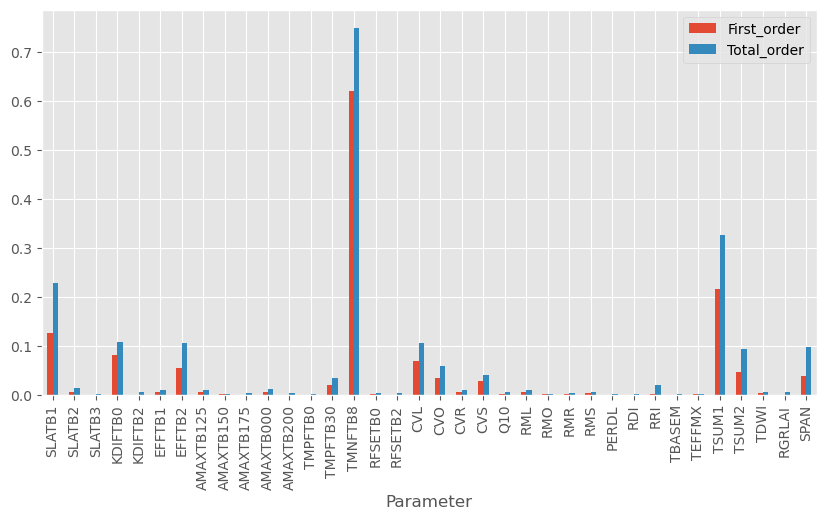

In [48]:
df_sensitivity = pd.DataFrame({
    "Parameter": problem["names"],
    "First_order": Si["S1"],
    "Total_order": Si["ST"]}).set_index("Parameter")
fig, axes = plt.subplots(figsize=(10,5))
df_sensitivity.plot(kind="bar", ax=axes)

In [103]:
df_2021 = df_sensitivity.copy()

In [104]:
ddd = df_sensitivity + df_2021

In [105]:
ddd = ddd / 2

<AxesSubplot:xlabel='Parameter'>

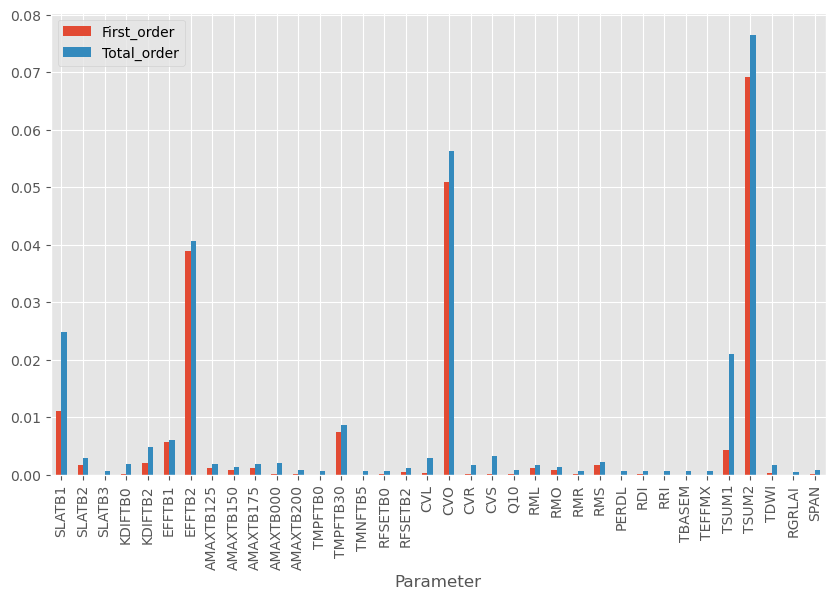

In [106]:
fig, axes = plt.subplots(figsize=(10,6))
ddd.plot(kind="bar", ax=axes)

### sobol分析

In [103]:
df_pp = pd.DataFrame(result_2021s["0"], columns=result_2021s["names1"])

In [104]:
Y = df_pp["TWSO"]

In [106]:
Y = Y.to_numpy()

In [107]:
Si = sobol.analyze(problem, Y, calc_second_order=calc_second_order)

<AxesSubplot:xlabel='Parameter'>

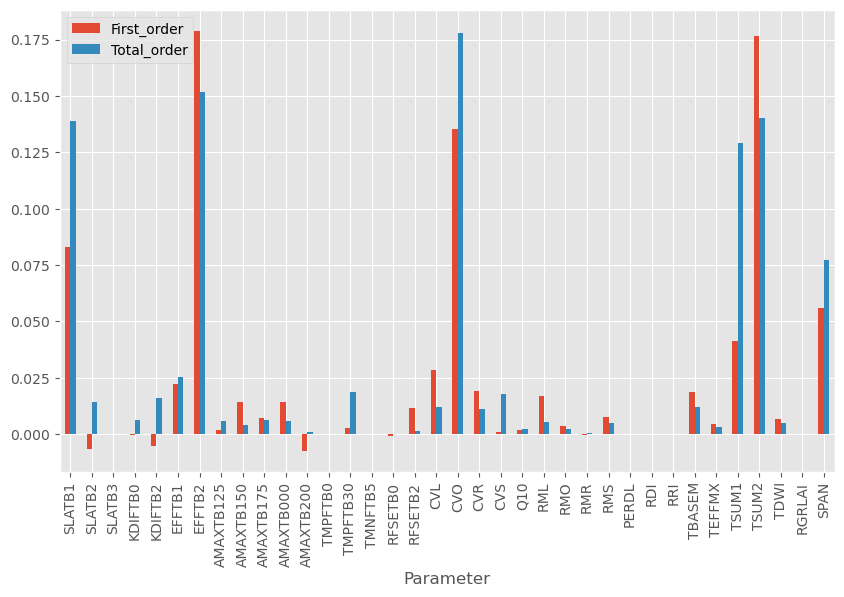

In [108]:
df_sensitivity = pd.DataFrame({
    "Parameter": problem["names"],
    "First_order": Si["S1"],
    "Total_order": Si["ST"]}).set_index("Parameter")
fig, axes = plt.subplots(figsize=(10,6))
df_sensitivity.plot(kind="bar", ax=axes)

In [ ]:
# row, col = paramsets.shape
# name = problem["names"]
# for i in range(0, 2):
#     print(name[i])
#     flag = 0
#     for j in range(20):
#         value = deciaml1(paramsets[j][i], 3)
#         parameters = crop_param.initial()
#         try:
#             parameters.set_override(name[i], value)
#         except PCSEError:
#             tmp_n = name[i][:-1]

#             tem_d1 = param_dict[tmp_n]
#             tmp_list = tem_d1[name[i]]
#             tmp_value = parameters[tmp_n]
#             try:
#                 tmp_value[tmp_list[1] -1], tmp_value[tmp_list[1]] = tmp_list[0], value
#             except IndexError:
#                 tmp_value.extend([tmp_list[0], value])
#             parameters.set_override(tmp_n, tmp_value)
#         try:
#             wofostpp = Wofost72_PP(parameters, wdp, agromanagement21)
#             wofostpp.run_till_terminate()
#             flag += 1
#         except ZeroDivisionError:
#             pass
#         except PartitioningError:
#             print("Error in partitioning")
#     print(flag)

In [72]:
col1 = final_target.copy()
col2 = time_target.copy()
col1.extend(["id"])
col2.extend(["id"])
result_pp["names1"] = col1
result_pp["names2"] = col2
result_wlp["names1"] = col1
result_wlp["names2"] = col2

In [81]:
# import pickle
# pkl_file = "./data/pickleFile/parameterset.pkl"
# pkl_data = paramsets
# with open(pkl_file, 'wb') as pf:
#     pickle.dump(pkl_data, pf)

In [55]:
Y = df_pp["TWSO"]

In [56]:
Y = Y.to_numpy()

In [57]:
Y

array([437.54855194, 392.2436496 , 355.1951152 , ..., 849.94165358,
       923.59473188, 981.80748112])

In [58]:
Si = fast.analyze(problem, Y, print_to_console=False)

<AxesSubplot:xlabel='Parameter'>

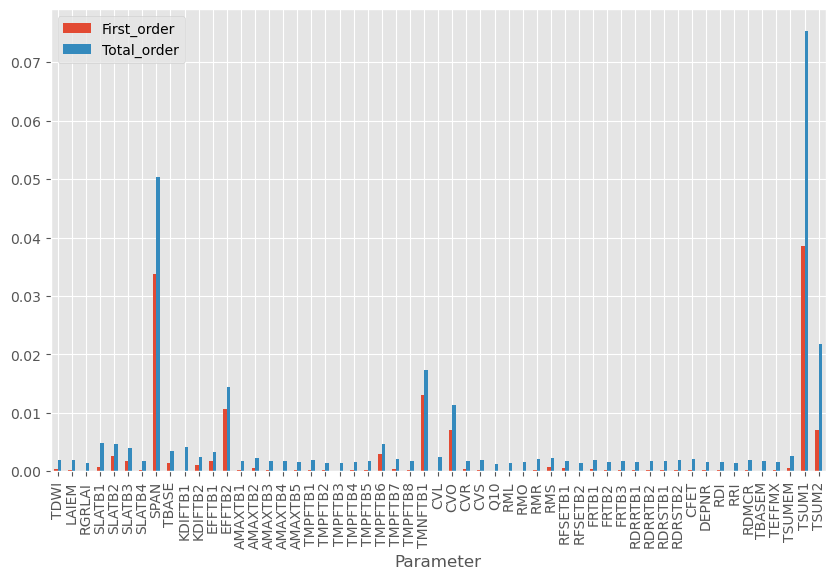

In [59]:
df_sensitivity = pd.DataFrame({
    "Parameter": problem["names"],
    "First_order": Si["S1"],
    "Total_order": Si["ST"]}).set_index("Parameter")
fig, axes = plt.subplots(figsize=(10,6))
df_sensitivity.plot(kind="bar", ax=axes)

In [35]:
df_sensitivity

,First_order,Total_order
Parameter,,
TDWI,0.000459,0.001895
LAIEM,0.000279,0.001949
RGRLAI,0.000141,0.001361
SLATB1,0.000781,0.004863
SLATB2,0.002553,0.004609
SLATB3,0.001712,0.003949
SLATB4,0.000278,0.001779
SPAN,0.033823,0.050343
TBASE,0.001453,0.003552


'01'

In [57]:
def aa(mm):
    return (0.5*mm, 1.5*mm)

In [62]:
parameters.clear_override()
for name in problem["names"][17: ]:
    bb = aa(parameters[name])
    print(f"{name}: {bb}")

CVL: (0.34, 1.02)
CVO: (0.3355, 1.0065)
CVR: (0.345, 1.035)
CVS: (0.329, 0.9870000000000001)
Q10: (1.0, 3.0)
RML: (0.015, 0.045)
RMO: (0.005, 0.015)
RMR: (0.0075, 0.0225)
RMS: (0.0075, 0.0225)
PERDL: (0.015, 0.045)
RDI: (5.0, 15.0)
RRI: (1.1, 3.3000000000000003)
TBASEM: (2.0, 6.0)
TEFFMX: (15.0, 45.0)
TSUM1: (347.5, 1042.5)
TSUM2: (400.0, 1200.0)
TDWI: (25.0, 75.0)
RGRLAI: (0.0147, 0.0441)
SPAN: (16.5, 49.5)


{'DVS': 2.0,
 'LAIMAX': 1.374125857971024,
 'TAGP': 6481.005715263842,
 'TWSO': 3696.896648798934,
 'TWLV': 862.3064007340049,
 'TWST': 1921.8026657309024,
 'TWRT': 481.2448555816113,
 'CTRAT': 9.615071426324379,
 'RD': 84.80000000000005,
 'DOS': datetime.date(2021, 6, 11),
 'DOE': datetime.date(2021, 6, 16),
 'DOA': datetime.date(2021, 7, 20),
 'DOM': datetime.date(2021, 8, 29),
 'DOH': None,
 'DOV': None,
 'CEVST': 5.01454052211001}

In [294]:
# row, col = paramsets.shape
# name = problem["names"]
# for i in range(0, 2):
#     print(name[i])
#     flag = 0
#     for j in range(20):
#         value = deciaml1(paramsets[j][i], 3)
#         parameters = crop_param.initial()
#         try:
#             parameters.set_override(name[i], value)
#         except PCSEError:
#             tmp_n = name[i][:-1]

#             tem_d1 = param_dict[tmp_n]
#             tmp_list = tem_d1[name[i]]
#             tmp_value = parameters[tmp_n]
#             try:
#                 tmp_value[tmp_list[1] -1], tmp_value[tmp_list[1]] = tmp_list[0], value
#             except IndexError:
#                 tmp_value.extend([tmp_list[0], value])
#             parameters.set_override(tmp_n, tmp_value)
#         try:
#             wofostpp = Wofost72_PP(parameters, wdp, agromanagement21)
#             wofostpp.run_till_terminate()
#             flag += 1
#         except ZeroDivisionError:
#             pass
#         except PartitioningError:
#             print("Error in partitioning")
#     print(flag)

TDWI
20
LAIEM
20


In [265]:
paramsets[j][i]

[0.0, 0.62, 0.33, 0.545, 0.88, 0.15, 0.95, 0.15, 1.1, 0.1, 1.2, 0.0, 2.0, 0.0]